In [57]:
import random
from datetime import datetime, timedelta

import pandas as pd
from pandas import DataFrame

from utils import determine_season, determine_time_of_day

In [58]:
# Function to add random noise
def add_minimum_randomness_to_base_power_rating(value, noise_level=0.03):
    noise = random.uniform(-noise_level, noise_level)
    return max(0, value + noise)  # Ensure the final value is not negative


In [59]:
# Base power rating of the device in kW (kilowatts)
base_power_rating = 0.5  # 500 watts

# Factors to adjust power usage
time_of_day_factors = {"morning": 0.9, "afternoon": 1.1, "evening": 1.0, "night": 0.8, "midnight": 0.7}
seasonal_factors = {"spring": 1.0, "summer": 1.15, "monsoon": 0.9, "winter": 1.1}
weekday_factors = {"weekday": 1.0, "weekend": 0.7}

In [60]:
# Generate data for one week
start_date = datetime.now()
data = []
for i in range(365*5*24):  # 7 days, 24 hours each
    current_time = start_date + timedelta(hours=i)
    season = determine_season(current_time)  # Random season
    time_of_day = determine_time_of_day(current_time)  # Random time of day
    weekday_or_weekend = "weekend" if current_time.weekday() >= 5 else "weekday"
    
    # # Add minimal randomness to the base power rating
    minimal_noise = add_minimum_randomness_to_base_power_rating(base_power_rating, noise_level=0.03)
    
    # Adjust power rating
    adjusted_power = base_power_rating * time_of_day_factors[time_of_day] * seasonal_factors[season] * weekday_factors[weekday_or_weekend] * minimal_noise


    print("Current time: ", current_time)
    print("Base power rating: ", base_power_rating, "kW")
    print("Time of day factor: ",time_of_day,"-", time_of_day_factors[time_of_day])
    print("Seasonal factor: ",season,"-", seasonal_factors[season])
    print("Weekday or weekend factor: ",weekday_or_weekend,"-", weekday_factors[weekday_or_weekend])
    print("Minimal noise: ",minimal_noise)
    print("Adjusted power rating: ",adjusted_power, "kW\n")

    # Assuming the device runs for the entire hour
    energy_consumed = adjusted_power  # in kWh

    data.append({
        "timestamp": current_time,
        "season": season,
        "time_of_day": time_of_day,
        "weekday_or_weekend": weekday_or_weekend,
        "energy_consumed": energy_consumed
    })

df = pd.DataFrame(data)

Current time:  2023-12-09 16:18:20.902347
Base power rating:  0.5 kW
Time of day factor:  afternoon - 1.1
Seasonal factor:  winter - 1.1
Weekday or weekend factor:  weekend - 0.7
Minimal noise:  0.5269665842473983
Adjusted power rating:  0.2231703484287732 kW

Current time:  2023-12-09 17:18:20.902347
Base power rating:  0.5 kW
Time of day factor:  evening - 1.0
Seasonal factor:  winter - 1.1
Weekday or weekend factor:  weekend - 0.7
Minimal noise:  0.5210265010305767
Adjusted power rating:  0.20059520289677202 kW

Current time:  2023-12-09 18:18:20.902347
Base power rating:  0.5 kW
Time of day factor:  evening - 1.0
Seasonal factor:  winter - 1.1
Weekday or weekend factor:  weekend - 0.7
Minimal noise:  0.5000027857701033
Adjusted power rating:  0.19250107252148976 kW

Current time:  2023-12-09 19:18:20.902347
Base power rating:  0.5 kW
Time of day factor:  evening - 1.0
Seasonal factor:  winter - 1.1
Weekday or weekend factor:  weekend - 0.7
Minimal noise:  0.5270380924993634
Adjuste

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [61]:
df.head(25)

,timestamp,season,time_of_day,weekday_or_weekend,energy_consumed
0,2023-12-09 16:18:20.902347,winter,afternoon,weekend,0.223170
1,2023-12-09 17:18:20.902347,winter,evening,weekend,0.200595
2,2023-12-09 18:18:20.902347,winter,evening,weekend,0.192501
3,2023-12-09 19:18:20.902347,winter,evening,weekend,0.202910
4,2023-12-09 20:18:20.902347,winter,night,weekend,0.154282
5,2023-12-09 21:18:20.902347,winter,night,weekend,0.162708
6,2023-12-09 22:18:20.902347,winter,night,weekend,0.151642
7,2023-12-09 23:18:20.902347,winter,night,weekend,0.160161
8,2023-12-10 00:18:20.902347,winter,midnight,weekend,0.142022
9,2023-12-10 01:18:20.902347,winter,midnight,weekend,0.129981


In [62]:
from utils import save_dataframe_in_csv

save_dataframe_in_csv(df, "generated")

ImportError: cannot import name 'save_dataframe_in_csv' from 'utils' (D:\Projects\passion_projects\sih-2023\energy-predicting-model\utils\__init__.py)

In [9]:
df.describe()

,timestamp,energy_consumed
count,43800,43800.000000
mean,2026-06-09 00:59:22.008490240,0.208838
min,2023-12-09 13:29:22.008491,0.103657
25%,2025-03-09 19:14:22.008491008,0.170088
50%,2026-06-09 00:59:22.008491008,0.203838
75%,2027-09-08 06:44:22.008491008,0.245528
max,2028-12-07 12:29:22.008491,0.335180
std,NaN,0.051749


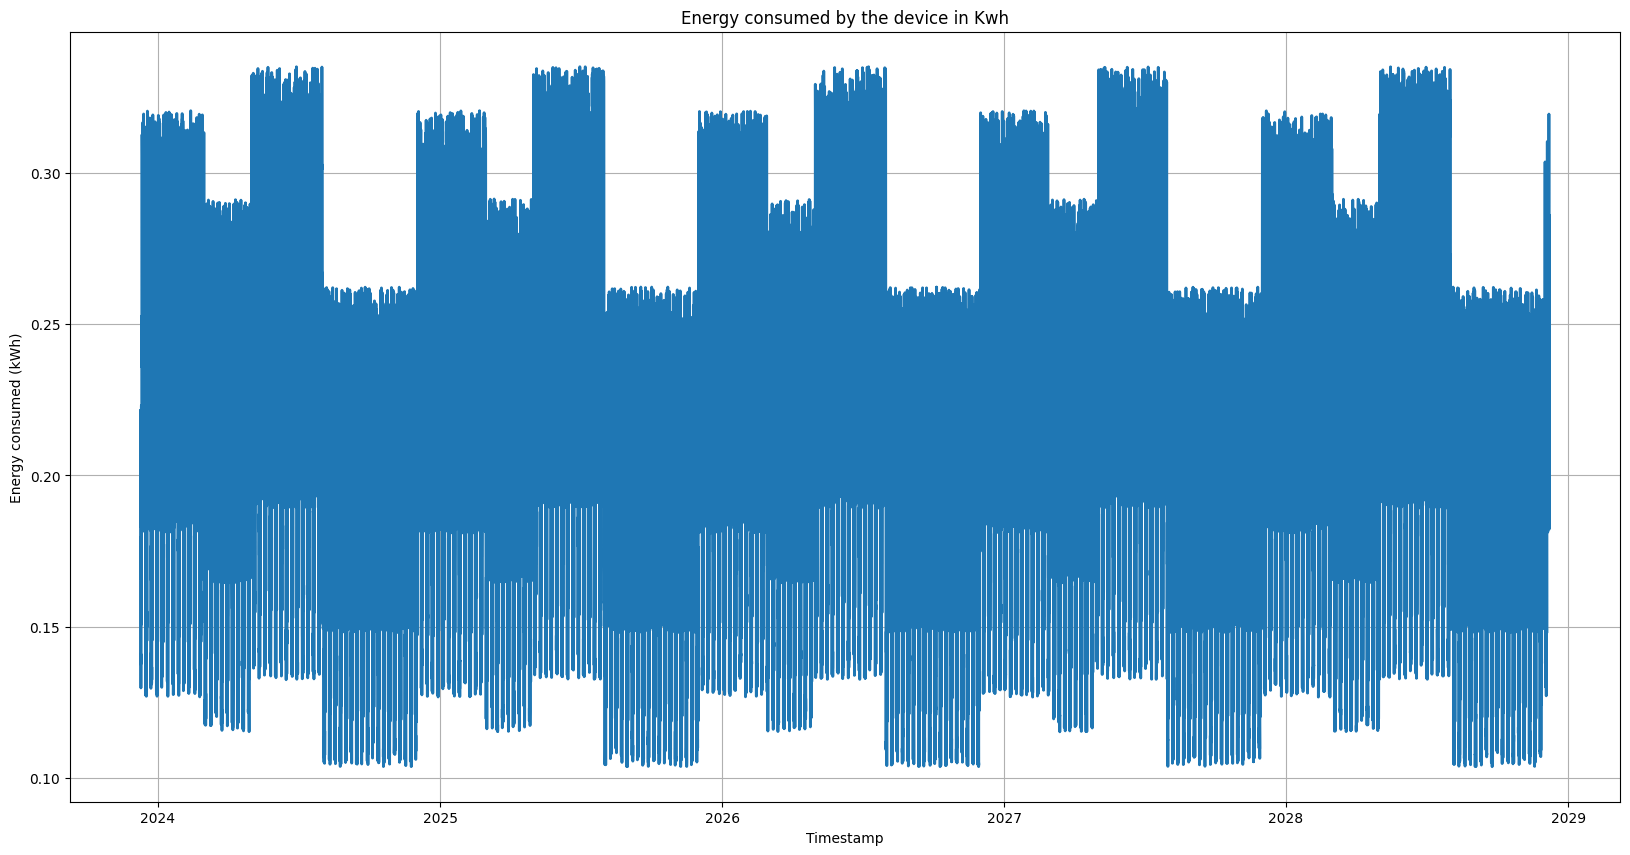

In [10]:
# Plot the  energy consumed as the y-axis and the timestamp as the x-axis
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(df["timestamp"], df["energy_consumed"], linestyle="solid", linewidth=2, markersize=12)

plt.xlabel("Timestamp")
plt.ylabel("Energy consumed (kWh)")
plt.title("Energy consumed by the device in Kwh")
plt.grid()
plt.show()


In [11]:
## Training and testing data
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

In [12]:
# Split the data
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]


In [13]:
# Print the shapes of the datasets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (35040, 5)
Testing set shape: (8760, 5)


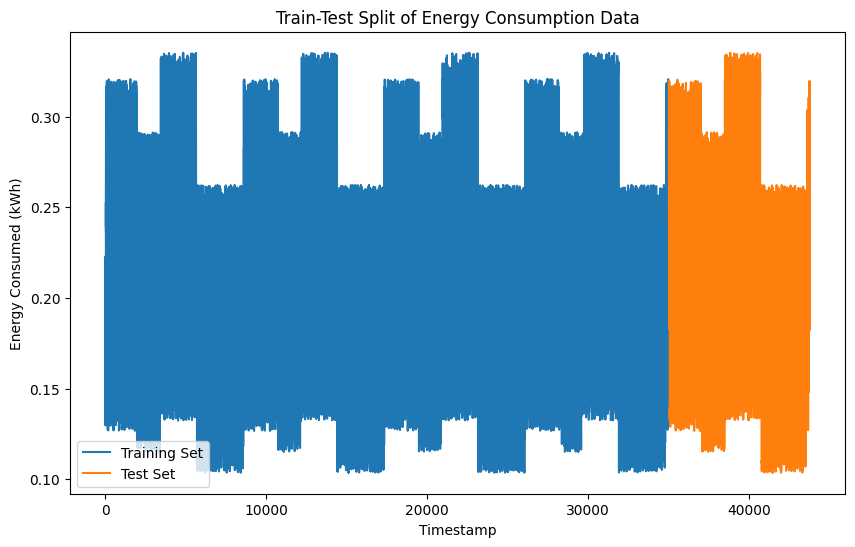

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_df.index, train_df['energy_consumed'], label='Training Set')
plt.plot(test_df.index, test_df['energy_consumed'], label='Test Set')
plt.title('Train-Test Split of Energy Consumption Data')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumed (kWh)')
plt.legend()
plt.show()


In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_df['energy_consumed'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpretation
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


ADF Statistic: -23.060138
p-value: 0.000000
Series is stationary


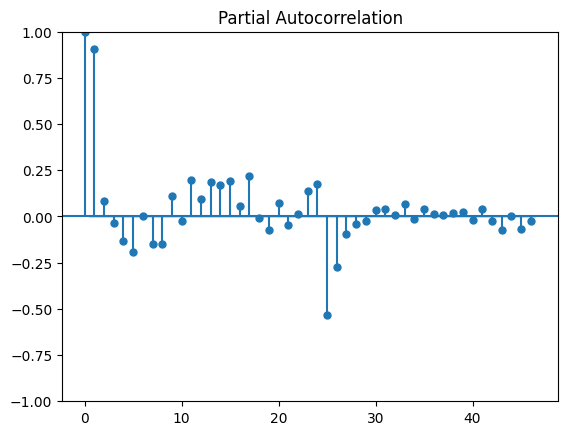

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot_acf(train_df['energy_consumed'])
plot_pacf(train_df['energy_consumed'])
plt.show()


In [17]:
# import pmdarima as pm
# 
# auto_model = pm.auto_arima(train_df['energy_consumed'], seasonal=False, stepwise=True)
# print(auto_model.summary())
# The output of the above code is(5,1,5)
# SARIMAX Results
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                35040
# Model:               SARIMAX(5, 1, 5)   Log Likelihood               86856.778
# Date:                Fri, 08 Dec 2023   AIC                        -173691.557
# Time:                        17:40:51   BIC                        -173598.451
# Sample:                             0   HQIC                       -173661.902
# - 35040
# Covariance Type:                  opg
# ==============================================================================
# coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1         -0.0276      0.011     -2.554      0.011      -0.049      -0.006
# ar.L2          0.5847      0.011     52.940      0.000       0.563       0.606
# ar.L3          0.7820      0.004    179.950      0.000       0.774       0.791
# ar.L4         -0.1116      0.009    -12.564      0.000      -0.129      -0.094
# ar.L5         -0.7200      0.010    -72.239      0.000      -0.740      -0.700
# ma.L1         -0.0928      0.014     -6.863      0.000      -0.119      -0.066
# ma.L2         -0.4595      0.011    -41.997      0.000      -0.481      -0.438
# ma.L3         -0.7250      0.005   -135.148      0.000      -0.736      -0.715
# ma.L4          0.3795      0.011     35.940      0.000       0.359       0.400
# ma.L5          0.5616      0.011     50.497      0.000       0.540       0.583
# sigma2         0.0004   2.68e-06    149.985      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                 187.06   Jarque-Bera (JB):              3339.78
# Prob(Q):                              0.00   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.94   Skew:                             0.17
# Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).


In [18]:
# import statsmodels.api as sm
# 
# # Create and fit the ARIMA model
# model = sm.tsa.ARIMA(train_df['energy_consumed'], order=(1, 1, 1))
# results = model.fit()

In [19]:
# Print the summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:        energy_consumed   No. Observations:                35040
Model:                 ARIMA(1, 1, 1)   Log Likelihood               84092.740
Date:                Sat, 09 Dec 2023   AIC                        -168179.480
Time:                        13:30:08   BIC                        -168154.088
Sample:                             0   HQIC                       -168171.392
                              - 35040                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1202      0.068     -1.778      0.075      -0.253       0.012
ma.L1         -0.0031      0.070     -0.044      0.965      -0.139       0.133
sigma2         0.0005   2.42e-06    199.362      0.0

In [21]:
# forecast_steps = 24
# results.forecast(steps=forecast_steps)

35040    0.301718
35041    0.302464
35042    0.302375
35043    0.302385
35044    0.302384
35045    0.302384
35046    0.302384
35047    0.302384
35048    0.302384
35049    0.302384
35050    0.302384
35051    0.302384
35052    0.302384
35053    0.302384
35054    0.302384
35055    0.302384
35056    0.302384
35057    0.302384
35058    0.302384
35059    0.302384
35060    0.302384
35061    0.302384
35062    0.302384
35063    0.302384
Name: predicted_mean, dtype: float64

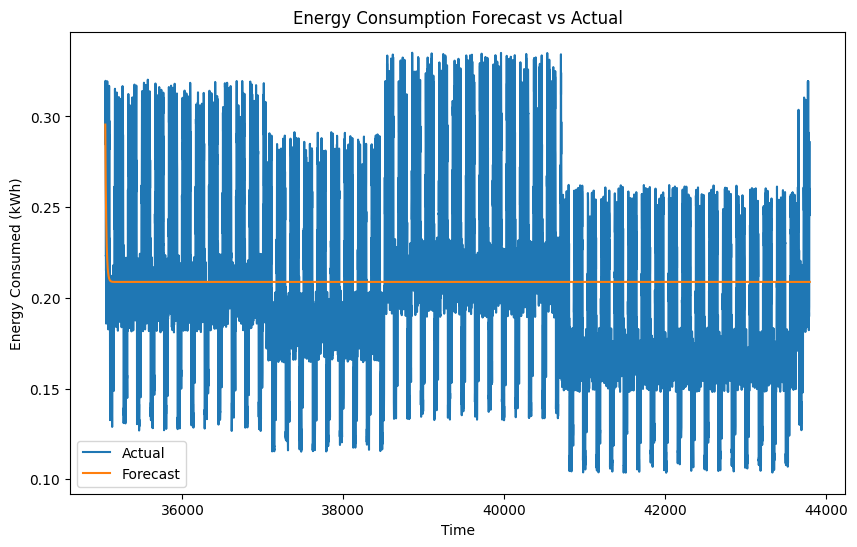

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Create and fit the model
model = ARIMA(train_df['energy_consumed'], order=(1, 0, 1))
fitted_model = model.fit()

# Forecast
forecast = fitted_model.forecast(steps=len(test_df))

# Compare forecast with actual values
plt.figure(figsize=(10, 6))
plt.plot(test_df.index, test_df['energy_consumed'], label='Actual')
plt.plot(test_df.index, forecast, label='Forecast')
plt.title('Energy Consumption Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Energy Consumed (kWh)')
plt.legend()
plt.show()


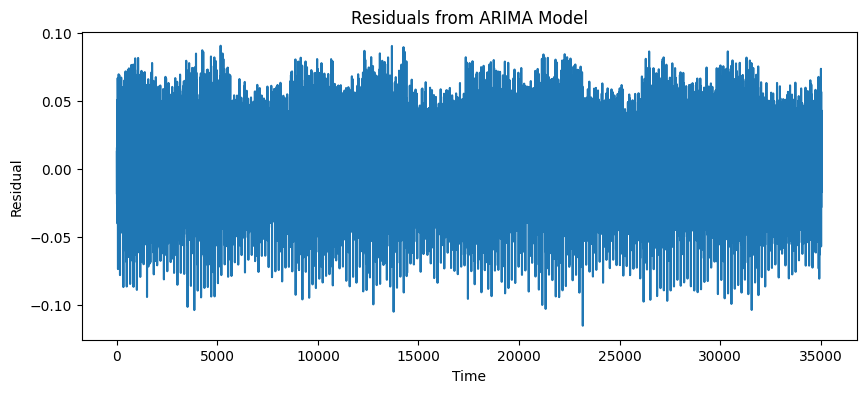

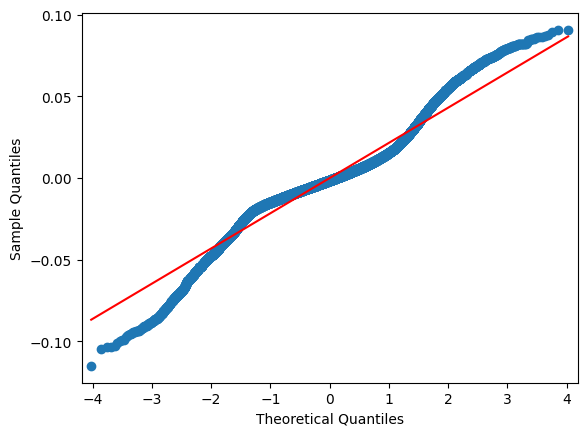

In [27]:
residuals = fitted_model.resid
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s')
plt.show()


D:\Projects\passion_projects\sih-2023\energy-predicting-model\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


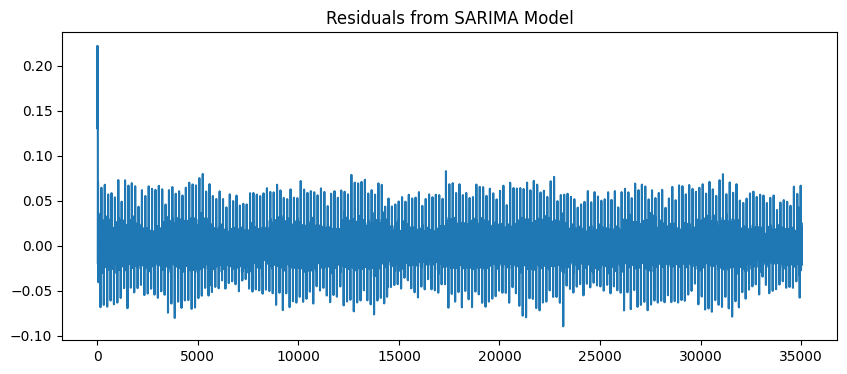

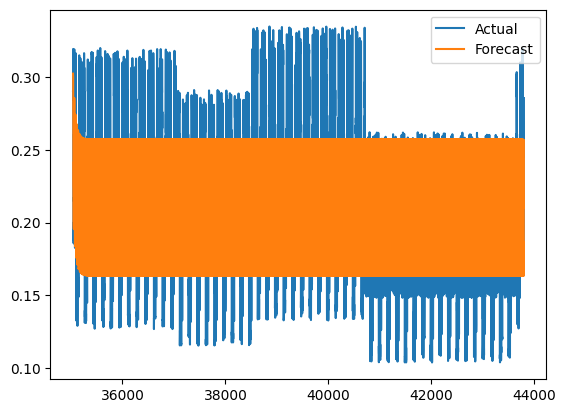

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the seasonal period
seasonal_period = 24  # Assuming hourly data with daily seasonality

# Fit the SARIMA model
sarima_model = SARIMAX(train_df['energy_consumed'],
                       order=(1,0,1),
                       seasonal_order=(1,1,1,seasonal_period))
sarima_results = sarima_model.fit()

# Diagnostics to check the residuals of the SARIMA model
sarima_resid = sarima_results.resid
plt.figure(figsize=(10,4))
plt.plot(sarima_resid)
plt.title('Residuals from SARIMA Model')
plt.show()

# Make predictions
sarima_forecast = sarima_results.forecast(steps=len(test_df))

# Plot the forecast vs actual values
plt.plot(test_df['energy_consumed'], label='Actual')
plt.plot(test_df.index, sarima_forecast, label='Forecast')
plt.legend()
plt.show()


In [30]:
df_prophet = df.rename(columns={'timestamp': 'ds', 'energy_consumed': 'y'})
df_prophet.head()

,ds,season,time_of_day,weekday_or_weekend,y
0,2023-12-09 13:29:22.008491,winter,afternoon,weekend,0.221491
1,2023-12-09 14:29:22.008491,winter,afternoon,weekend,0.204686
2,2023-12-09 15:29:22.008491,winter,afternoon,weekend,0.218354
3,2023-12-09 16:29:22.008491,winter,afternoon,weekend,0.199209
4,2023-12-09 17:29:22.008491,winter,evening,weekend,0.183055


In [41]:
from prophet import Prophet

# Create a Prophet model
m = Prophet()

# Fit the model to your dataframe
m.fit(df_prophet)


14:20:35 - cmdstanpy - INFO - Chain [1] start processing
14:20:41 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
# Create a dataframe for future predictions
# Include the frequency 'H' for hourly data
future = m.make_future_dataframe(periods=24, freq='H')

# Use the model to make predictions
forecast = m.predict(future)


D:\Projects\passion_projects\sih-2023\energy-predicting-model\venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Projects\passion_projects\sih-2023\energy-predicting-model\venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
D:\Projects\passion_projects\sih-2023\energy-predicting-model\venv\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future ve

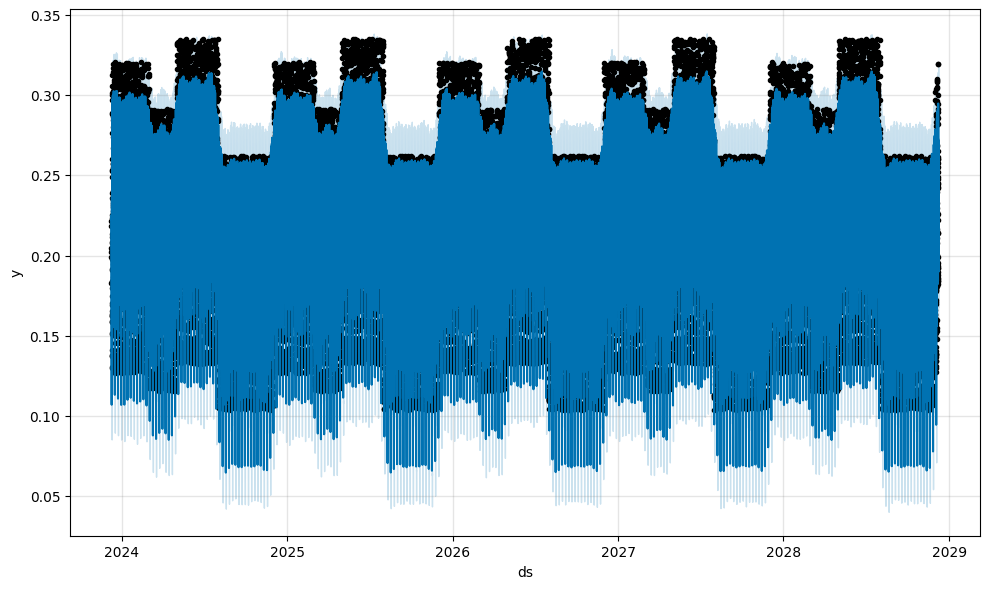

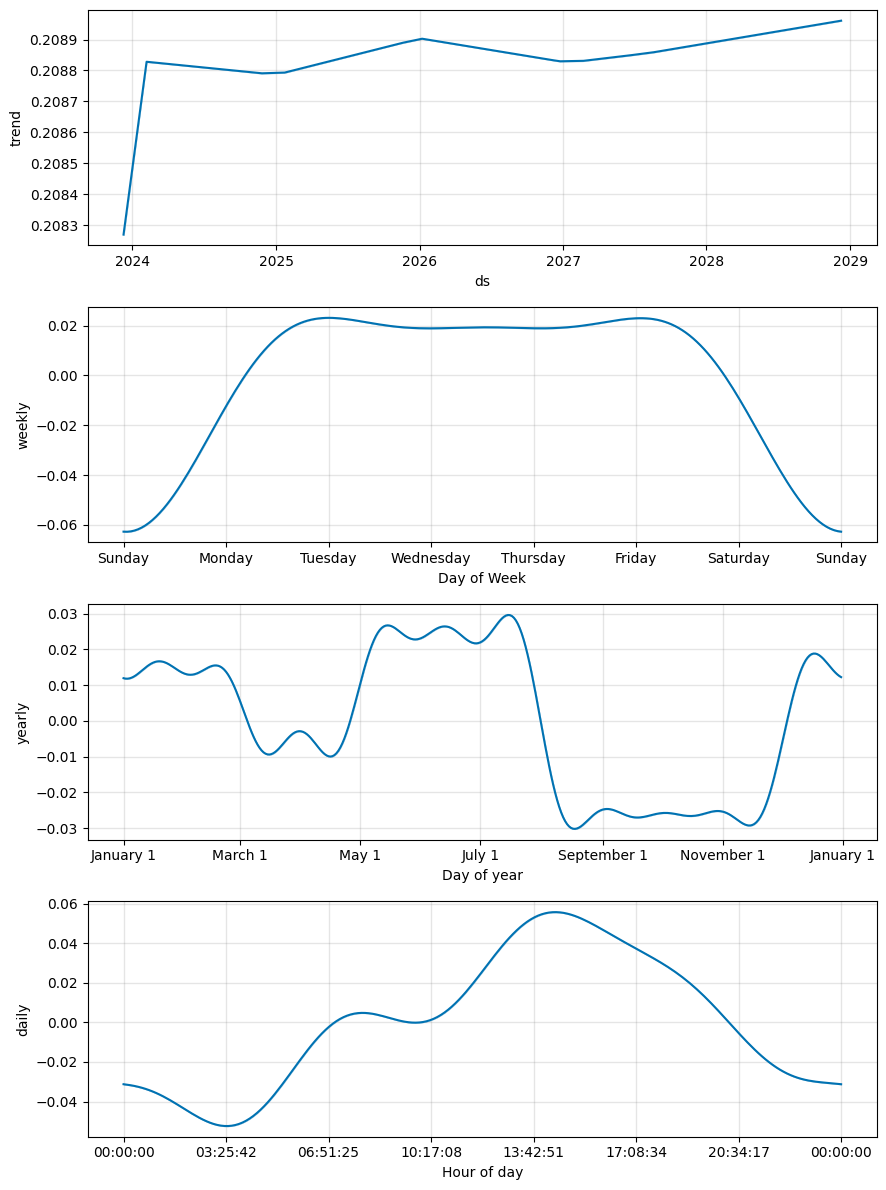

In [43]:
# Plot the forecast
fig1 = m.plot(forecast)

# Plot the forecast components
fig2 = m.plot_components(forecast)


In [38]:
from prophet.diagnostics import cross_validation

# Perform cross-validation
# Initial: the size of the initial training period
# Period: the spacing between cutoff dates
# Horizon: the forecast horizon
df_cv = cross_validation(m, initial='1095 days', period='180 days', horizon = '365 days')

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)


  0%|          | 0/3 [00:00<?, ?it/s]

14:16:03 - cmdstanpy - INFO - Chain [1] start processing
14:16:05 - cmdstanpy - INFO - Chain [1] done processing
14:16:08 - cmdstanpy - INFO - Chain [1] start processing
14:16:14 - cmdstanpy - INFO - Chain [1] done processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
df_p.head(100)


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 12:00:00,0.000346,0.018591,0.015048,0.072716,0.055496,0.071064,0.777397
1,36 days 13:00:00,0.000345,0.018586,0.015048,0.072730,0.055564,0.071080,0.777778
2,36 days 14:00:00,0.000345,0.018573,0.015037,0.072699,0.055579,0.071055,0.778158
3,36 days 15:00:00,0.000345,0.018566,0.015028,0.072693,0.055564,0.071056,0.778919
4,36 days 16:00:00,0.000344,0.018544,0.015008,0.072638,0.055533,0.071001,0.779680
...,...,...,...,...,...,...,...,...
95,40 days 11:00:00,0.000345,0.018575,0.014999,0.072304,0.054818,0.070666,0.775114
96,40 days 12:00:00,0.000346,0.018589,0.015007,0.072452,0.054854,0.070779,0.775114
97,40 days 13:00:00,0.000346,0.018599,0.015013,0.072535,0.054854,0.070848,0.774734
98,40 days 14:00:00,0.000346,0.018599,0.015016,0.072599,0.054908,0.070904,0.774734


In [47]:
m = Prophet()
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_seasonality(name='daily', period=1, fourier_order=3)
m.add_seasonality(name='weekly', period=7, fourier_order=3)
# ... and so on for other seasonal patterns you expect


In [53]:
# Rename columns to 'ds' and 'y'
df_prophet1 = df.rename(columns={'timestamp': 'ds', 'energy_consumption': 'y'})
df_prophet1.head()


,ds,season,time_of_day,weekday_or_weekend,energy_consumed
0,2023-12-09 13:29:22.008491,winter,afternoon,weekend,0.221491
1,2023-12-09 14:29:22.008491,winter,afternoon,weekend,0.204686
2,2023-12-09 15:29:22.008491,winter,afternoon,weekend,0.218354
3,2023-12-09 16:29:22.008491,winter,afternoon,weekend,0.199209
4,2023-12-09 17:29:22.008491,winter,evening,weekend,0.183055


In [54]:
# Fit the model
m.fit(df_prophet)


ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.